In [34]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [35]:
import pandas as pd
df=pd.read_csv('avocado.csv')

In [9]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [36]:
df


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [37]:
df.dtypes


Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [38]:
df.shape


(18249, 14)

In [39]:
df.columns


Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [40]:
df.drop('Unnamed: 0',inplace=True,axis=1)


In [41]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [42]:
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

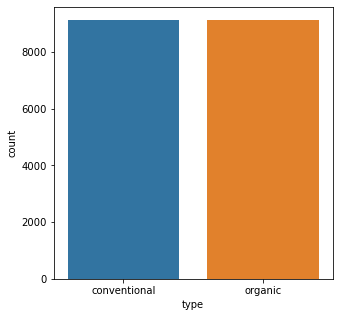

In [43]:
plt.figure(figsize=(5,5))
sns.countplot(df.type)

In [44]:
df.type.value_counts()


conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

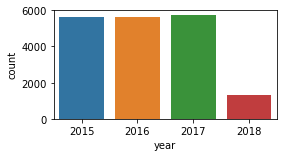

In [45]:
plt.figure(figsize=(4,2))
sns.countplot(df.year)

In [46]:
df.year.value_counts()


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [47]:
df.region.value_counts()


RichmondNorfolk        338
SanDiego               338
NewYork                338
Sacramento             338
DallasFtWorth          338
Philadelphia           338
California             338
Portland               338
BuffaloRochester       338
Southeast              338
Northeast              338
Syracuse               338
Pittsburgh             338
GreatLakes             338
Columbus               338
Boston                 338
SanFrancisco           338
Jacksonville           338
Midsouth               338
SouthCentral           338
LosAngeles             338
Boise                  338
Chicago                338
Spokane                338
Tampa                  338
Plains                 338
GrandRapids            338
Roanoke                338
NorthernNewEngland     338
Louisville             338
Houston                338
MiamiFtLauderdale      338
RaleighGreensboro      338
HartfordSpringfield    338
LasVegas               338
SouthCarolina          338
Denver                 338
A

In [48]:
df.groupby('year')['type'].value_counts()


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

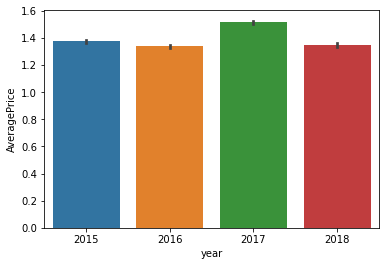

In [49]:
sns.barplot(x='year',y='AveragePrice',data=df)


<AxesSubplot:xlabel='year', ylabel='Total Volume'>

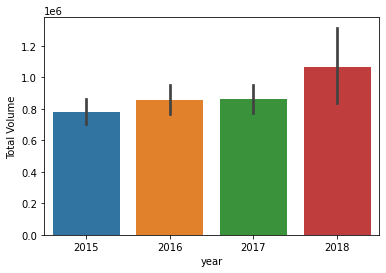

In [50]:
sns.barplot(x='year',y='Total Volume',data=df)


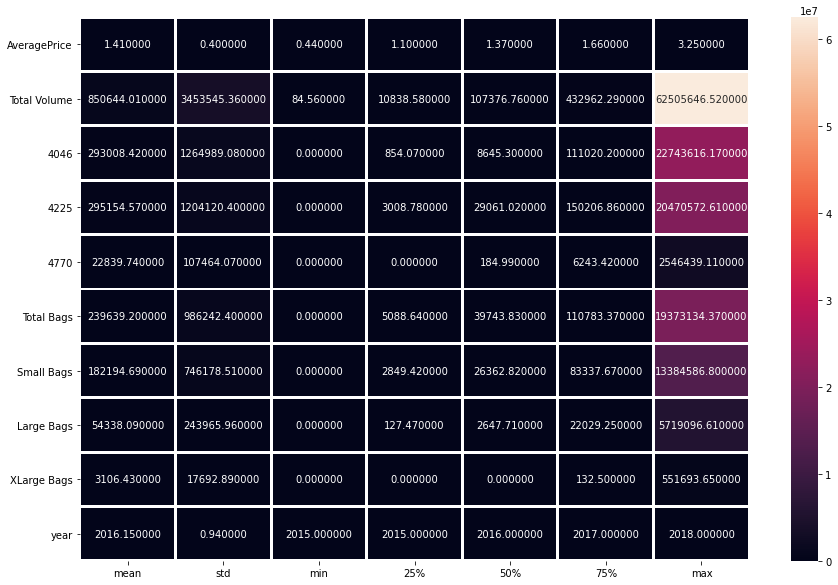

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")

plt.show()

<AxesSubplot:>

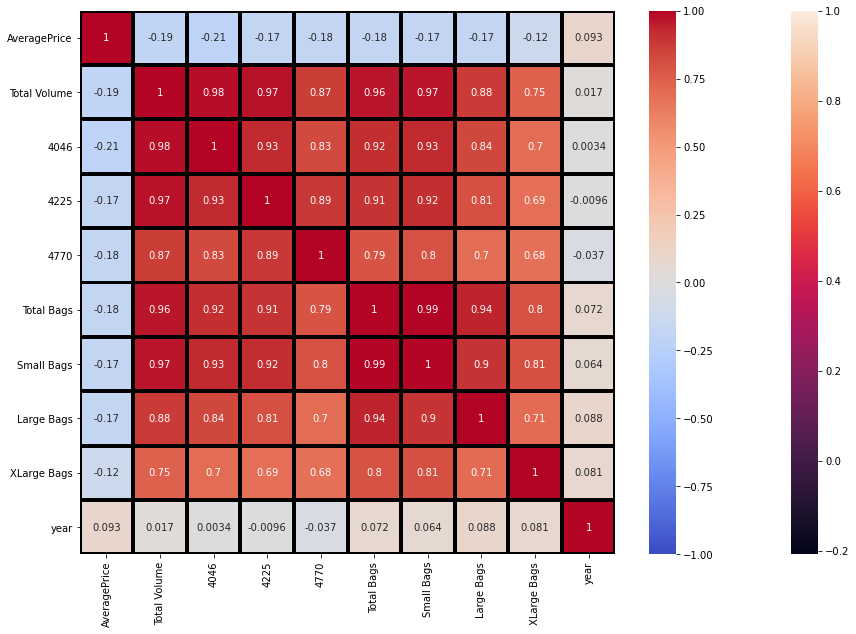

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>],
       [<AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

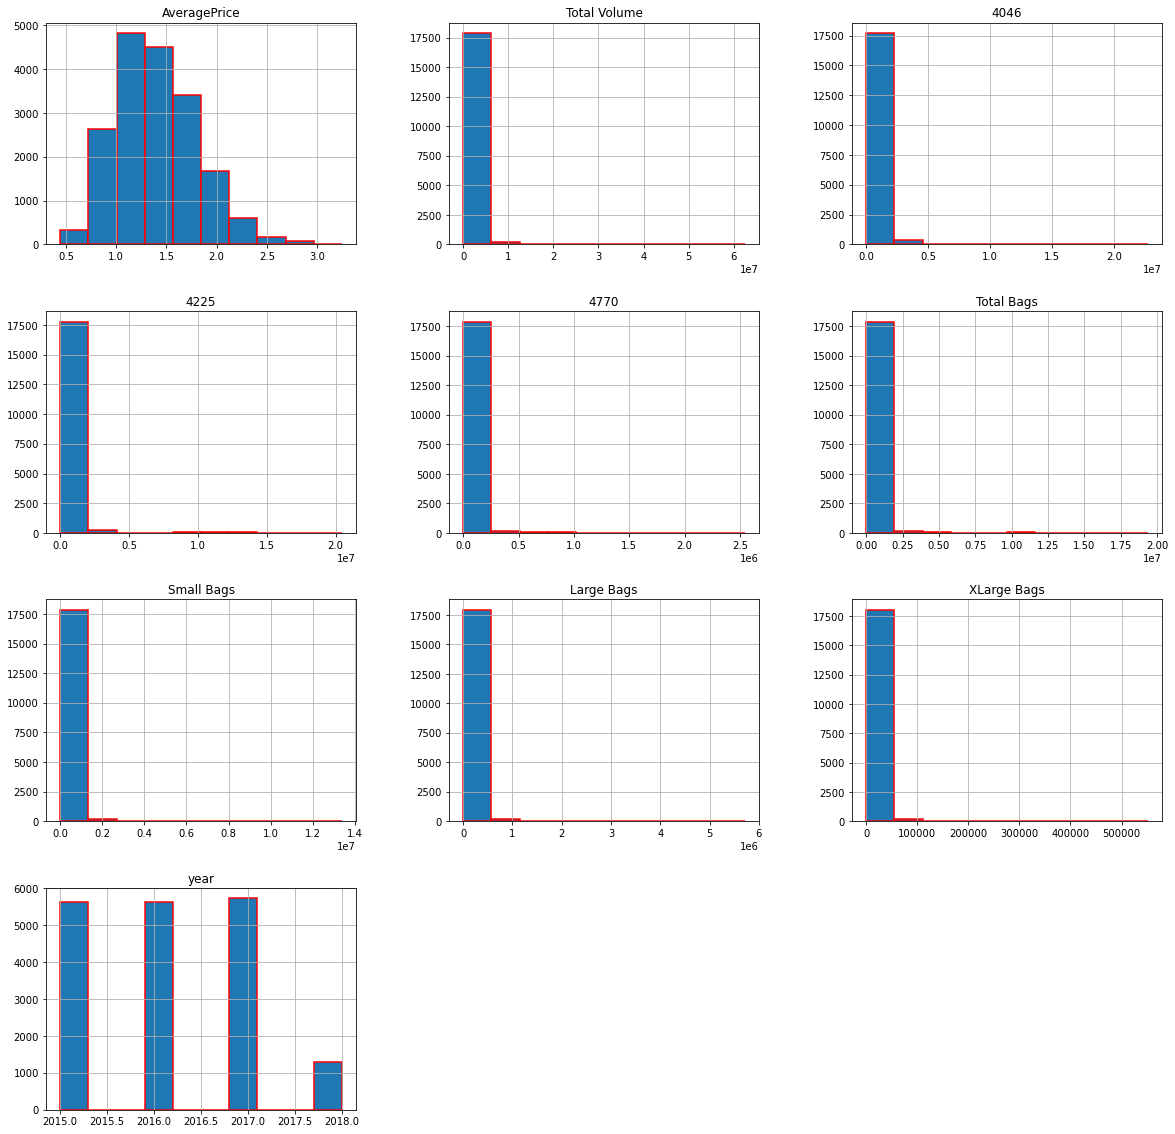

In [53]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

Text(0, 0.5, 'Total Volume')

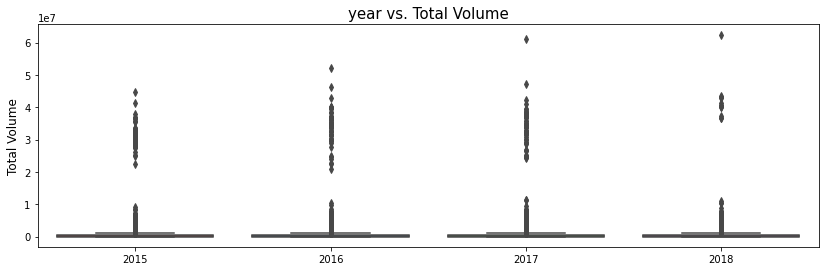

In [54]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='year', y='Total Volume', data=df, palette="Set1")
a.set_title("year vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

Text(0, 0.5, 'Total Volume')

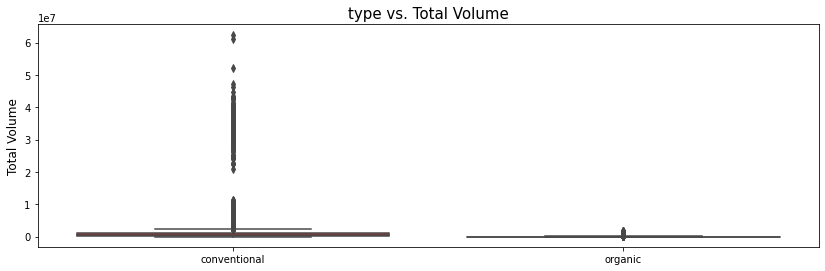

In [55]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='type', y='Total Volume', data=df, palette="Set1")
a.set_title("type vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

In [56]:
df.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [57]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

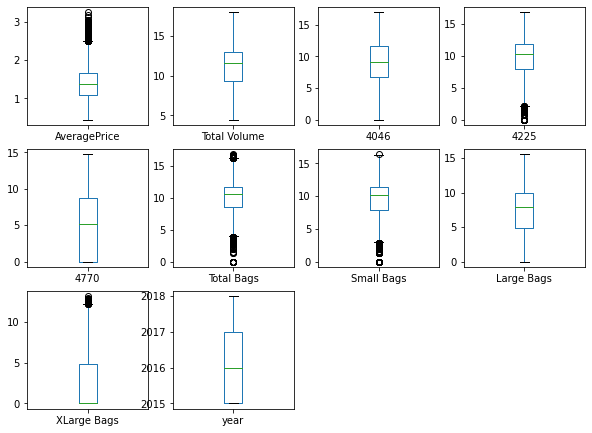

In [63]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

In [64]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [65]:
import datetime


<AxesSubplot:title={'center':'Average price each month'}, xlabel='months', ylabel='AveragePrice'>

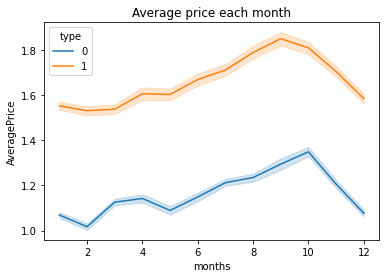

In [66]:
df['Date']=pd.to_datetime(df['Date'])
df["months"]=df['Date'].map(lambda x : x.month)
plt.title('Average price each month')
sns.lineplot(x='months',y='AveragePrice',data=df,hue='type')

In [67]:
da=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [68]:
df.dtypes


Date              int32
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
months            int64
dtype: object

In [69]:
df.shape


(18249, 14)

In [70]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z)

[[1.1650728  0.18868864 0.10728205 ... 1.22128204 1.7002522  1.64763162]
 [1.16582202 0.13901962 0.1759487  ... 1.22128204 1.7002522  1.64763162]
 [1.16657123 1.18206895 0.15869039 ... 1.22128204 1.7002522  1.64763162]
 ...
 [1.92748314 1.15237477 0.77890112 ... 1.97050371 1.70081131 1.46495942]
 [1.92673392 1.30138182 0.70779758 ... 1.97050371 1.70081131 1.46495942]
 [1.92598471 0.53151208 0.67454176 ... 1.97050371 1.70081131 1.46495942]]


In [71]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [72]:
df_new=df[(z<3).all(axis=1)]


In [73]:
print(df.shape)
print(df_new.shape)
df=df_new
print('shape after removing outliers',df.shape)

(18249, 14)
(17834, 14)
shape after removing outliers (17834, 14)


In [74]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [75]:
percentage_loss=((18249-17840 )/18249)*100
print(percentage_loss)

2.2412186969148995


In [76]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date            19579.000000
AveragePrice        0.560000
Total Volume        3.670237
4046                4.823705
4225                3.908651
4770                8.783225
Total Bags          3.005780
Small Bags          3.251940
Large Bags          5.098820
XLarge Bags         5.036547
type                1.000000
year                2.000000
region             27.000000
months              6.000000
dtype: float64


In [77]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]
new_df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months
0,20151227,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0,12
1,20151220,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0,12
2,20151213,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0,12
3,20151206,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0,12
4,20151129,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53,2
18245,20180128,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53,1
18246,20180121,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53,1
18247,20180114,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53,1


In [78]:
percentage_loss=((18249-11538  )/18249)*100
print(percentage_loss)

36.774617787276014


In [79]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split
x = df_new.iloc[:,2:13]
y = df_new['AveragePrice']

In [81]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.13249789, -0.62742619,  0.35800125, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [-0.20162572, -0.75550098,  0.28688711, ..., -0.97748783,
        -1.22957126, -1.69078431],
       [ 0.13526087, -0.70658843,  0.6067806 , ..., -0.97748783,
        -1.22957126, -1.69078431],
       ...,
       [-0.8086277 , -0.58588682, -0.75103402, ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.73704662, -0.51197383, -0.681276  , ...,  1.02303064,
         1.96090944,  1.71404749],
       [-0.70356744, -0.32153998, -0.76541289, ...,  1.02303064,
         1.96090944,  1.71404749]])

In [82]:
y=le.fit_transform(y)


In [83]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [ ]:
Classification

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [87]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.022427810485001403
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [88]:
gnb=GaussianNB()


In [89]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))


0.008690776562938042
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.20      0.50      0.29         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.01      0.67      0.01         3
          17       0.00      0.00      0.00     

In [90]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.025511634426689096
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [91]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.024109896271376507
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [92]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.025511634426689096
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [93]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.024109896271376507
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00     

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.03336136809643959
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00      

In [95]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.045416316232127836
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00     

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,preddt))

0.045416316232127836


In [97]:
y_pred_prob=dt.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

NameError: name 'FP' is not defined

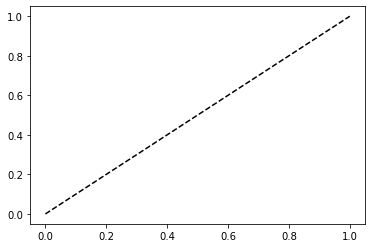

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(FP,tpr,label='Decision tree classifier')
plt.xlabel('False result heart disease')
plt.ylabel('True result heart disease')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [101]:
max_r_score=0
for r_state in range (30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)

max r2 score corresponding to:- 81 is 0.5637829009995536


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 


In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.1713009405003536

In [ ]:
LINEAR REGRESSION

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [105]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x00000209463C14C0> (array([[-1.34366435, -0.39059947, -1.5422677 , ...,  1.02303064,
        -0.10422044, -0.40001389],
       [ 0.34242636,  0.34837508,  0.24206969, ..., -0.97748783,
        -1.27486262, -1.24530269],
       [-0.17611796,  0.26302649, -0.78611128, ..., -0.97748783,
        -1.27486262, -1.50682143],
       ...,
       [-1.98167416, -1.41111424, -1.16984869, ...,  1.02303064,
        -0.10422044, -0.78915657],
       [-1.15067119, -0.35870072, -1.5687141 , ...,  1.02303064,
        -0.10422044,  0.30733867],
       [-1.15626982, -0.43594407, -1.47499235, ...,  1.02303064,
        -0.10422044,  0.30733867]]), array([124.04675695,  63.48683323,  59.08407233, ..., 151.38947961,
       113.76922198, 115.62986766]))
RMSE is : 25.784040481755085


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
LASSO REGRESSION

In [107]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [108]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- -31.56326327282517
R2_score is:- 56.37826089581357


At cv:- 3
Cross validation score is :- 13.065544582644971
R2_score is:- 56.37826089581357


At cv:- 4
Cross validation score is :- 13.031688272503406
R2_score is:- 56.37826089581357


At cv:- 5
Cross validation score is :- 22.76183968100156
R2_score is:- 56.37826089581357


At cv:- 6
Cross validation score is :- 15.745678202194691
R2_score is:- 56.37826089581357


At cv:- 7
Cross validation score is :- 18.553069203066492
R2_score is:- 56.37826089581357


At cv:- 8
Cross validation score is :- 17.712372285342283
R2_score is:- 56.37826089581357


At cv:- 9
Cross validation score is :- 18.68356013015181
R2_score is:- 56.37826089581357




In [109]:
print ("at cv :-",5)
print("at cross validation score is :-",22.6594)
print("r2_score:-",52.9190)

at cv :- 5
at cross validation score is :- 22.6594
r2_score:- 52.919


In [114]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [115]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:-
MeanAbsoluteError: 20.43512253394648
MeanSquaredError: 664.8171886505573
RootMeanSquareError: 25.78404911278594


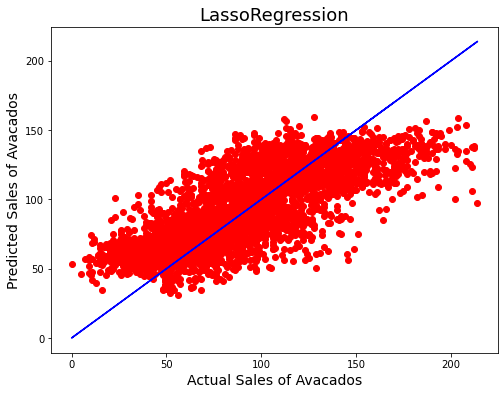

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [ ]:
Decision Tree Regressor

In [117]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [118]:
dt=DecisionTreeRegressor(criterion='friedman_mse',splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

R2 Score: 66.01191188541017
cross val score: -45.345069417802485


In [119]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

Error:-
MeanAbsoluteError: 14.835996635828428
MeanSquaredError: 517.995514437903
RootMeanSquareError: 22.759514811126863


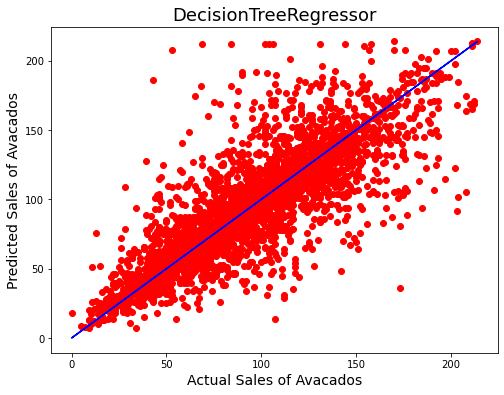

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [ ]:
Gradient Boosting Regressor

In [121]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [122]:
gbr=GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_gbr=gbr.predict(x_test)

gbrs=r2_score(y_test,pred_gbr)
print('R2 SCORE',gbrs*100)

gbscore=cross_val_score(gbr,x,y,cv=5)
gbrc=gbscore.mean()
print('CrossValScore:',gbrc*100)

R2 SCORE 74.89840233850241
CrossValScore: 41.18352376542346


In [123]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_gbr))
print('MeanSquaredError:',mean_squared_error(y_test,pred_gbr))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

Error:-
MeanAbsoluteError: 14.753697016497844
MeanSquaredError: 382.5609416464707
RootMeanSquareError: 19.559165157196016


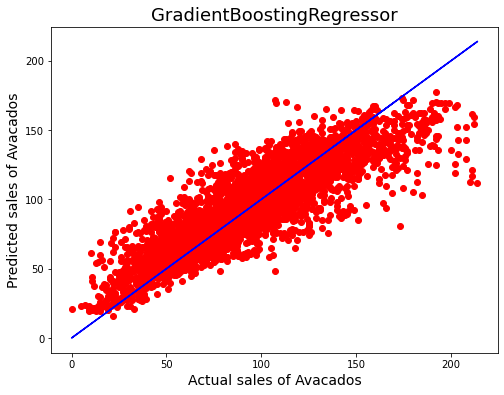

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_gbr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("GradientBoostingRegressor",fontsize=18)
plt.show()

In [ ]:
AdaBoost Regressor

In [125]:
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
parameters={'base_estimator':[None], 'learning_rate':[1.0,2.0], 'loss':['linear','square','exponential'],'n_estimators':[50,100],'random_state':[50]}
ADB=AdaBoostRegressor()
clf=GridSearchCV(ADB,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 2.0, 'loss': 'square', 'n_estimators': 100, 'random_state': 50}


In [126]:
ADB=AdaBoostRegressor(base_estimator=None,learning_rate=2.0,loss='square',n_estimators=100,random_state=50)
ADB.fit(x_train,y_train)
ADB.score(x_train,y_train)
pred_ADB=ADB.predict(x_test)

ADBS=r2_score(y_test,pred_ADB)
print('R2 Score:',ADBS*100)

ADBSscore=cross_val_score(ADB,x,y,cv=5)
ADBC=ADBSscore.mean()
print('cross val score:',ADBC*100)

R2 Score: 52.972530883030736
cross val score: -10.026454042877688


In [127]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ADB))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ADB))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ADB)))

Error:-
MeanAbsoluteError: 21.860112420442036
MeanSquaredError: 716.7222226748387
RootMeanSquareError: 26.771668283370737


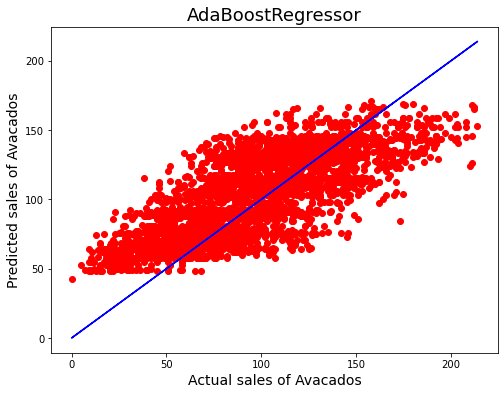

In [128]:
plt.figure(figsize=(8,6))

plt.scatter(x=y_test,y=pred_ADB,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("AdaBoostRegressor",fontsize=18)
plt.show()

In [ ]:
SGD Regressor

In [129]:
from sklearn.linear_model import SGDRegressor
parameters={'alpha':[0.0001,0.001,0.01,0.1],'epsilon':[0.01,0.1],'penalty':['elasticnet'],'max_iter':[1000],'tol':[1e-3]}
SGD=SGDRegressor()
clf=GridSearchCV(SGD,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)

{'alpha': 0.001, 'epsilon': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 0.001}


In [130]:
SGD=SGDRegressor(alpha=0.0001,epsilon=0.01,max_iter=1000,penalty='elasticnet',tol=0.001)
SGD.fit(x_train,y_train)
pred_SGD=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},Cross_Val_score={cvscore*100}and difference={(r2score*100)-(cvscore*100)}")

Accuracy=56.378290099955365,Cross_Val_score=53.264678428706205and difference=3.11361167124916


In [131]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_SGD))
print('MeanSquaredError:',mean_squared_error(y_test,pred_SGD))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_SGD)))

Error:-
MeanAbsoluteError: 20.483294782294173
MeanSquaredError: 665.6984376760794
RootMeanSquareError: 25.801132488247088


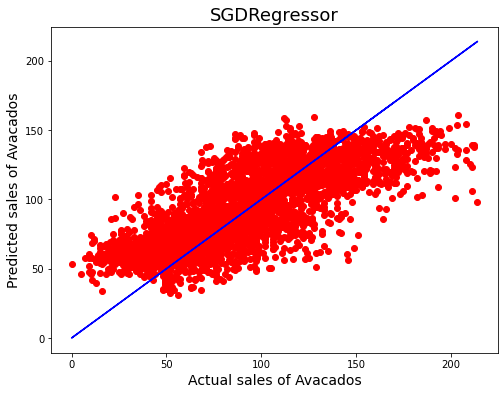

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_SGD,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual sales of Avacados",fontsize=14)
plt.ylabel("Predicted sales of Avacados",fontsize=14)
plt.title("SGDRegressor",fontsize=18)
plt.show()

In [133]:
parameters={"alpha":[0.0001,0.001,0.01,0.1,1,10],"epsilon":[0.01,0.1],'max_iter':[1000],'tol':[1e-3]}

from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(SGDRegressor(),parameters,cv=5,scoring='r2')

GCV.fit(x_train,y_train)
GCV.best_estimator_
GCV_pred=GCV.best_estimator_.predict(x_test)


print("Final accuracy:",r2_score(y_test,GCV_pred)*100)
clf.fit

Final accuracy: 56.286974988696194


<bound method BaseSearchCV.fit of GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'epsilon': [0.01, 0.1], 'max_iter': [1000],
                         'penalty': ['elasticnet'], 'tol': [0.001]})>

In [ ]:
SERIALIZTION

In [134]:
import pickle
filename='inhouse_avacadoproject.pkl'

In [135]:
pickle.dump(SGD,open(filename,'wb'))

In [ ]:
CONCLUSION

In [137]:
import numpy as np
a=np.array(y_test)
predicted=np.array(SGD.predict(x_test))

In [138]:
df_final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))


In [139]:
df_final


,original,predicted
0,170,124.903247
1,72,63.368757
2,56,60.150598
3,150,111.201541
4,58,82.569805
...,...,...
3562,100,86.356710
3563,60,71.784060
3564,161,151.227341
3565,143,114.584377
